<a href="https://colab.research.google.com/github/NavneetRajSingh/iNeubytes-Tasks/blob/main/task_2_iNeubytes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 2 (iNeuBytes)**



# Utilize the CIFAR-10 Dataset to train a CNN model  

---



Step 1 - Dataset Preparation

Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from keras.applications import VGG19
from keras.optimizers import Adam
from sklearn.metrics import  confusion_matrix,classification_report

In [2]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [4]:
print(X_train.shape)
X_train_split = X_train[:40000]
y_train_split = y_train[:40000]

X_val = X_train[40000:]
y_val = y_train[40000:]
print(X_train_split.shape)
print(X_val.shape)

(50000, 32, 32, 3)
(40000, 32, 32, 3)
(10000, 32, 32, 3)


In [5]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

80134624/80134624 [==============================] - 3s 0us/step


In [6]:
for layer in base_model.layers:
    layer.trainable = False

In [7]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [10]:
lr=0.001
model.compile(optimizer=Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
history=model.fit(X_train, y_train, batch_size=128, epochs=3, validation_split=0.2)

Epoch 1/3
313/313 [==============================] - 819s 3s/step - loss: 1.6487 - accuracy: 0.4175 - val_loss: 1.3742 - val_accuracy: 0.5123
Epoch 2/3
313/313 [==============================] - 884s 3s/step - loss: 1.3976 - accuracy: 0.5070 - val_loss: 1.2855 - val_accuracy: 0.5442
Epoch 3/3
313/313 [==============================] - 819s 3s/step - loss: 1.3357 - accuracy: 0.5288 - val_loss: 1.2575 - val_accuracy: 0.5528


In [14]:
accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100}")

313/313 [==============================] - 156s 498ms/step - loss: 1.2729 - accuracy: 0.5517
Test Accuracy: [1.2728921175003052, 0.5516999959945679, 1.2728921175003052, 0.5516999959945679, 1.2728921175003052, 0.5516999959945679, 1.2728921175003052, 0.5516999959945679, 1.2728921175003052, 0.5516999959945679, 1.2728921175003052, 0.5516999959945679, 1.2728921175003052, 0.5516999959945679, 1.2728921175003052, 0.5516999959945679, 1.2728921175003052, 0.5516999959945679, 1.2728921175003052, 0.5516999959945679, 1.2728921175003052, 0.5516999959945679, 1.2728921175003052, 0.5516999959945679, 1.2728921175003052, 0.5516999959945679, 1.2728921175003052, 0.5516999959945679, 1.2728921175003052, 0.5516999959945679, 1.2728921175003052, 0.5516999959945679, 1.2728921175003052, 0.5516999959945679, 1.2728921175003052, 0.5516999959945679, 1.2728921175003052, 0.5516999959945679, 1.2728921175003052, 0.5516999959945679, 1.2728921175003052, 0.5516999959945679, 1.2728921175003052, 0.5516999959945679, 1.272892117

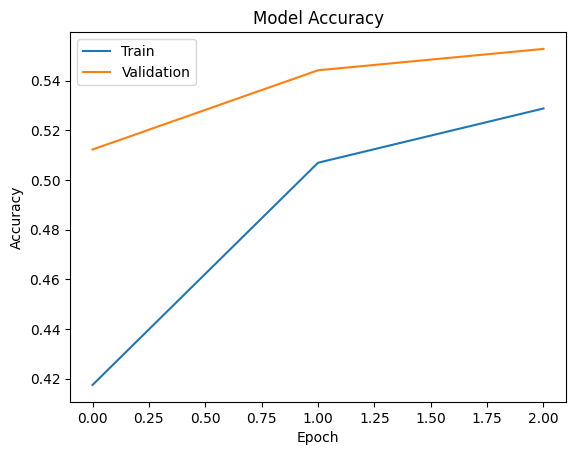

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**CNN model**

In [16]:

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(X_train, y_train, batch_size=128, epochs=1, validation_split=0.2)

313/313 [==============================] - 167s 530ms/step - loss: 1.4895 - accuracy: 0.4661 - val_loss: 1.2058 - val_accuracy: 0.5775


In [17]:
cnn_loss, cnn_accuracy = model.evaluate(X_test, y_test)
print(f"CNN Model - Test Loss: {cnn_loss:.4f}")
print(f"CNN Model - Test Accuracy: {cnn_accuracy*100:.2f}%")

313/313 [==============================] - 11s 34ms/step - loss: 1.1991 - accuracy: 0.5729
CNN Model - Test Loss: 1.1991
CNN Model - Test Accuracy: 57.29%


In [18]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in base_model.layers:
    layer.trainable = False

**Transfer Learning**

---



In [19]:
transfer_model = Sequential()
transfer_model.add(base_model)
transfer_model.add(Flatten())
transfer_model.add(Dense(256, activation='relu'))
transfer_model.add(Dropout(0.5))
transfer_model.add(Dense(10, activation='softmax'))
lr=0.001
transfer_model.compile(optimizer=Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])
transfer_model.fit(X_train, y_train, batch_size=128, epochs=1, validation_split=0.2)

313/313 [==============================] - 827s 3s/step - loss: 1.6452 - accuracy: 0.4190 - val_loss: 1.3917 - val_accuracy: 0.5071


In [20]:
transfer_loss, transfer_accuracy = transfer_model.evaluate(X_test, y_test)
print(f"Transfer Learning Model - Test Loss: {transfer_loss:.4f}")
print(f"Transfer Learning Model - Test Accuracy: {transfer_accuracy*100:.2f}%")

313/313 [==============================] - 155s 493ms/step - loss: 1.3967 - accuracy: 0.5125
Transfer Learning Model - Test Loss: 1.3967
Transfer Learning Model - Test Accuracy: 51.25%


In [22]:
transfer_pred = transfer_model.predict(X_test)
transfer_labels = np.argmax(y_test, axis=1)
transfer_pred = np.argmax(transfer_pred, axis=1)

313/313 [==============================] - 155s 492ms/step


In [23]:
transfer_report = classification_report(transfer_labels, transfer_pred)
transfer_confusion = confusion_matrix(transfer_labels, transfer_pred)
print("Transfer Learning Model Evaluation Metrics:")
print(transfer_report)
print("Transfer Learning Model Confusion Matrix:")
print(transfer_confusion)

Transfer Learning Model Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.56      0.57      0.57      1000
           1       0.54      0.54      0.54      1000
           2       0.43      0.30      0.35      1000
           3       0.40      0.32      0.36      1000
           4       0.49      0.49      0.49      1000
           5       0.63      0.34      0.44      1000
           6       0.49      0.70      0.57      1000
           7       0.52      0.59      0.55      1000
           8       0.53      0.72      0.61      1000
           9       0.55      0.55      0.55      1000

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.50     10000
weighted avg       0.51      0.51      0.50     10000

Transfer Learning Model Confusion Matrix:
[[575  34  49  16  17   4  23  33 209  40]
 [ 41 543  14  23  17   7  56  43  81 175]
 [129  37 297  68 131  53 140  55  69  21]
 [ 35  68  75 318  72  75 

In [24]:
cnn_pred = model.predict(X_test)
cnn_labels = np.argmax(y_test, axis=1)
cnn_pred = np.argmax(cnn_pred, axis=1)

313/313 [==============================] - 11s 33ms/step


In [25]:
cnn_report = classification_report(cnn_labels, cnn_pred)
cnn_confusion = confusion_matrix(cnn_labels, cnn_pred)
print("CNN Model Evaluation Metrics:")
print(cnn_report)
print("CNN Model Confusion Matrix:")
print(cnn_confusion)

CNN Model Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.65      0.63      0.64      1000
           1       0.78      0.60      0.68      1000
           2       0.50      0.32      0.39      1000
           3       0.43      0.33      0.38      1000
           4       0.48      0.54      0.51      1000
           5       0.50      0.48      0.49      1000
           6       0.50      0.76      0.60      1000
           7       0.69      0.62      0.66      1000
           8       0.68      0.69      0.69      1000
           9       0.56      0.74      0.64      1000

    accuracy                           0.57     10000
   macro avg       0.58      0.57      0.57     10000
weighted avg       0.58      0.57      0.57     10000

CNN Model Confusion Matrix:
[[627  24  59  20  28   9  37  10 121  65]
 [ 28 604   4   4   7   6  30  13  47 257]
 [ 73   7 323  62 202 107 130  35  32  29]
 [ 11   9  65 331  93 195 194  42  14  46]
 [ 31   5  

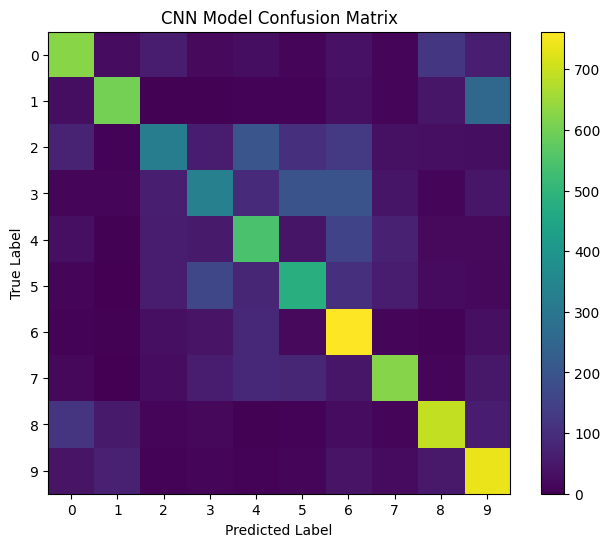

In [26]:
plt.figure(figsize=(8, 6))
plt.imshow(cnn_confusion, cmap='viridis')
plt.title('CNN Model Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.show()


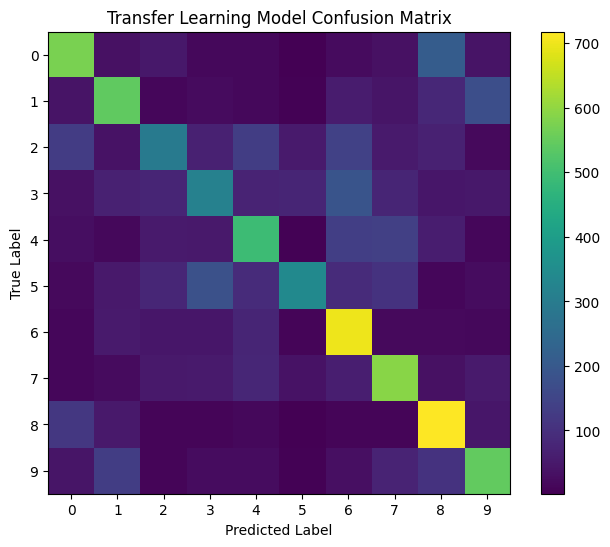

In [27]:
plt.figure(figsize=(8, 6))
plt.imshow(transfer_confusion, cmap='viridis')
plt.title('Transfer Learning Model Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.show()

In [28]:
metrics_table = pd.DataFrame({
    'Model': ['CNN Model', 'Transfer Learning Model'],
    'Test Loss': [cnn_loss, transfer_loss],
    'Test Accuracy': [cnn_accuracy, transfer_accuracy]
})

In [29]:
print("Evaluation Metrics:")
print(metrics_table)

Evaluation Metrics:
                     Model  Test Loss  Test Accuracy
0                CNN Model   1.199133         0.5729
1  Transfer Learning Model   1.396700         0.5125


In [30]:
cnn_train_loss, cnn_train_acc = model.evaluate(X_train, y_train)
print(f"CNN Model - Training Loss: {cnn_train_loss:.4f}")
print(f"CNN Model - Training Accuracy: {cnn_train_acc*100:.2f}%")

1563/1563 [==============================] - 53s 34ms/step - loss: 1.1562 - accuracy: 0.5930
CNN Model - Training Loss: 1.1562
CNN Model - Training Accuracy: 59.30%


In [31]:
transfer_train_loss, transfer_train_acc = transfer_model.evaluate(X_train, y_train)
print(f"Transfer Learning Model - Training Loss: {transfer_train_loss:.4f}")
print(f"Transfer Learning Model - Training Accuracy: {transfer_train_acc*100:.2f}%")

1563/1563 [==============================] - 769s 492ms/step - loss: 1.3793 - accuracy: 0.5197
Transfer Learning Model - Training Loss: 1.3793
Transfer Learning Model - Training Accuracy: 51.97%


In [32]:
performance_table = pd.DataFrame({
    'Model': ['CNN Model', 'Transfer Learning Model'],
    'Training Accuracy': [cnn_train_acc, transfer_train_acc],
    'Test Accuracy': [cnn_accuracy, transfer_accuracy]
})

print("Model Performance on Training and Testing Sets:")
print(performance_table)

Model Performance on Training and Testing Sets:
                     Model  Training Accuracy  Test Accuracy
0                CNN Model            0.59302         0.5729
1  Transfer Learning Model            0.51970         0.5125
